# EDA

In [73]:
# Importing relevant packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [74]:
life_expectancy_data = "Life Expectancy Data.csv"
df = pd.read_csv(life_expectancy_data) # Reading the CSV file into a pandas DataFrame

In [75]:
# Checking the number of nulls in each column

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [76]:
# Creating a function to calculate the number of nulls and the percentage of nulls in each column

def null_vals(dataframe):
    null_vals = dataframe.isnull().sum()
    total_cnt = len(dataframe)
    null_vals = pd.DataFrame(null_vals, columns=['null'])
    null_vals['percent'] = round((null_vals['null'] / total_cnt) * 100, 3)

    return null_vals.sort_values('percent', ascending=False)

In [77]:
# Checking for nulls

null_vals(df)

,null,percent
Population,652,22.192
Hepatitis B,553,18.822
GDP,448,15.248
Total expenditure,226,7.692
Alcohol,194,6.603
Income composition of resources,167,5.684
Schooling,163,5.548
thinness 5-9 years,34,1.157
thinness 1-19 years,34,1.157
BMI,34,1.157


In [78]:
# Checking rows that has nulls in the 'Alcohol' column

df.loc[df['Alcohol'].isnull()].head(50)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.0,93.0,309,...,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.0,96.0,0,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,NaN,0.0,98.0,0,...,98.0,NaN,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5


In [79]:
# Filling the nulls in the 'Alcohol' column with the next available value

df['Alcohol'] = df['Alcohol'].bfill(axis ='rows')

In [80]:
# Checking for nulls

null_vals(df)

,null,percent
Population,652,22.192
Hepatitis B,553,18.822
GDP,448,15.248
Total expenditure,226,7.692
Income composition of resources,167,5.684
Schooling,163,5.548
thinness 5-9 years,34,1.157
thinness 1-19 years,34,1.157
BMI,34,1.157
Diphtheria,19,0.647


In [81]:
# Dropping rows that have missing values in columns with nulls occupying less than 2% of its data.

df.dropna(subset=['Life expectancy ', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years'], inplace=True)

In [82]:
# Checking for nulls

null_vals(df)

,null,percent
Population,644,22.299
Hepatitis B,525,18.179
GDP,435,15.062
Total expenditure,212,7.341
Schooling,160,5.540
Income composition of resources,160,5.540
Polio,0,0.000
thinness 5-9 years,0,0.000
thinness 1-19 years,0,0.000
HIV/AIDS,0,0.000


In [83]:
# Calculating the pairwise correlation between the columns

df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_7312\4156408424.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170772,-0.080136,-0.037310,-0.080626,0.031834,0.105399,-0.083198,0.105360,-0.042781,0.096300,0.086266,0.136667,-0.141273,0.102807,0.015938,-0.044713,-0.047784,0.239247,0.212443
Life expectancy,0.170772,1.000000,-0.693189,-0.197408,0.401905,0.381173,0.255871,-0.160525,0.567055,-0.223172,0.464166,0.215251,0.478194,-0.560382,0.460507,-0.022897,-0.476342,-0.470744,0.726189,0.760373
Adult Mortality,-0.080136,-0.693189,1.000000,0.078712,-0.195876,-0.241062,-0.163169,0.032587,-0.386460,0.093854,-0.271549,-0.112453,-0.272017,0.526784,-0.294040,-0.012899,0.302124,0.307695,-0.451037,-0.447893
infant deaths,-0.037310,-0.197408,0.078712,1.000000,-0.114559,-0.085716,-0.225136,0.501103,-0.227574,0.996635,-0.171630,-0.128895,-0.175967,0.025280,-0.108457,0.556835,0.466297,0.471925,-0.149335,-0.204670
Alcohol,-0.080626,0.401905,-0.195876,-0.114559,1.000000,0.334449,0.091471,-0.050703,0.337763,-0.111450,0.222526,0.306384,0.220941,-0.049542,0.348705,-0.035195,-0.428389,-0.417253,0.442781,0.539060
percentage expenditure,0.031834,0.381173,-0.241062,-0.085716,0.334449,1.000000,0.015830,-0.057329,0.231526,-0.087828,0.146904,0.176645,0.143203,-0.098387,0.899204,-0.026205,-0.252621,-0.254143,0.385364,0.400079
Hepatitis B,0.105399,0.255871,-0.163169,-0.225136,0.091471,0.015830,1.000000,-0.122423,0.155174,-0.234638,0.484553,0.068496,0.611706,-0.114026,0.082934,-0.125253,-0.122479,-0.127039,0.197257,0.220066
Measles,-0.083198,-0.160525,0.032587,0.501103,-0.050703,-0.057329,-0.122423,1.000000,-0.176145,0.507846,-0.137803,-0.106573,-0.143337,0.031004,-0.077104,0.265894,0.224876,0.221120,-0.136878,-0.150021
BMI,0.105360,0.567055,-0.386460,-0.227574,0.337763,0.231526,0.155174,-0.176145,1.000000,-0.238016,0.287579,0.236767,0.286077,-0.243839,0.305240,-0.071956,-0.529737,-0.536757,0.515526,0.568202
under-five deaths,-0.042781,-0.223172,0.093854,0.996635,-0.111450,-0.087828,-0.234638,0.507846,-0.238016,1.000000,-0.189641,-0.130325,-0.196457,0.038143,-0.111976,0.544494,0.468373,0.472832,-0.167384,-0.220212


C:\Users\User\AppData\Local\Temp\ipykernel_7312\776098424.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask = np.triu(df.corr()))


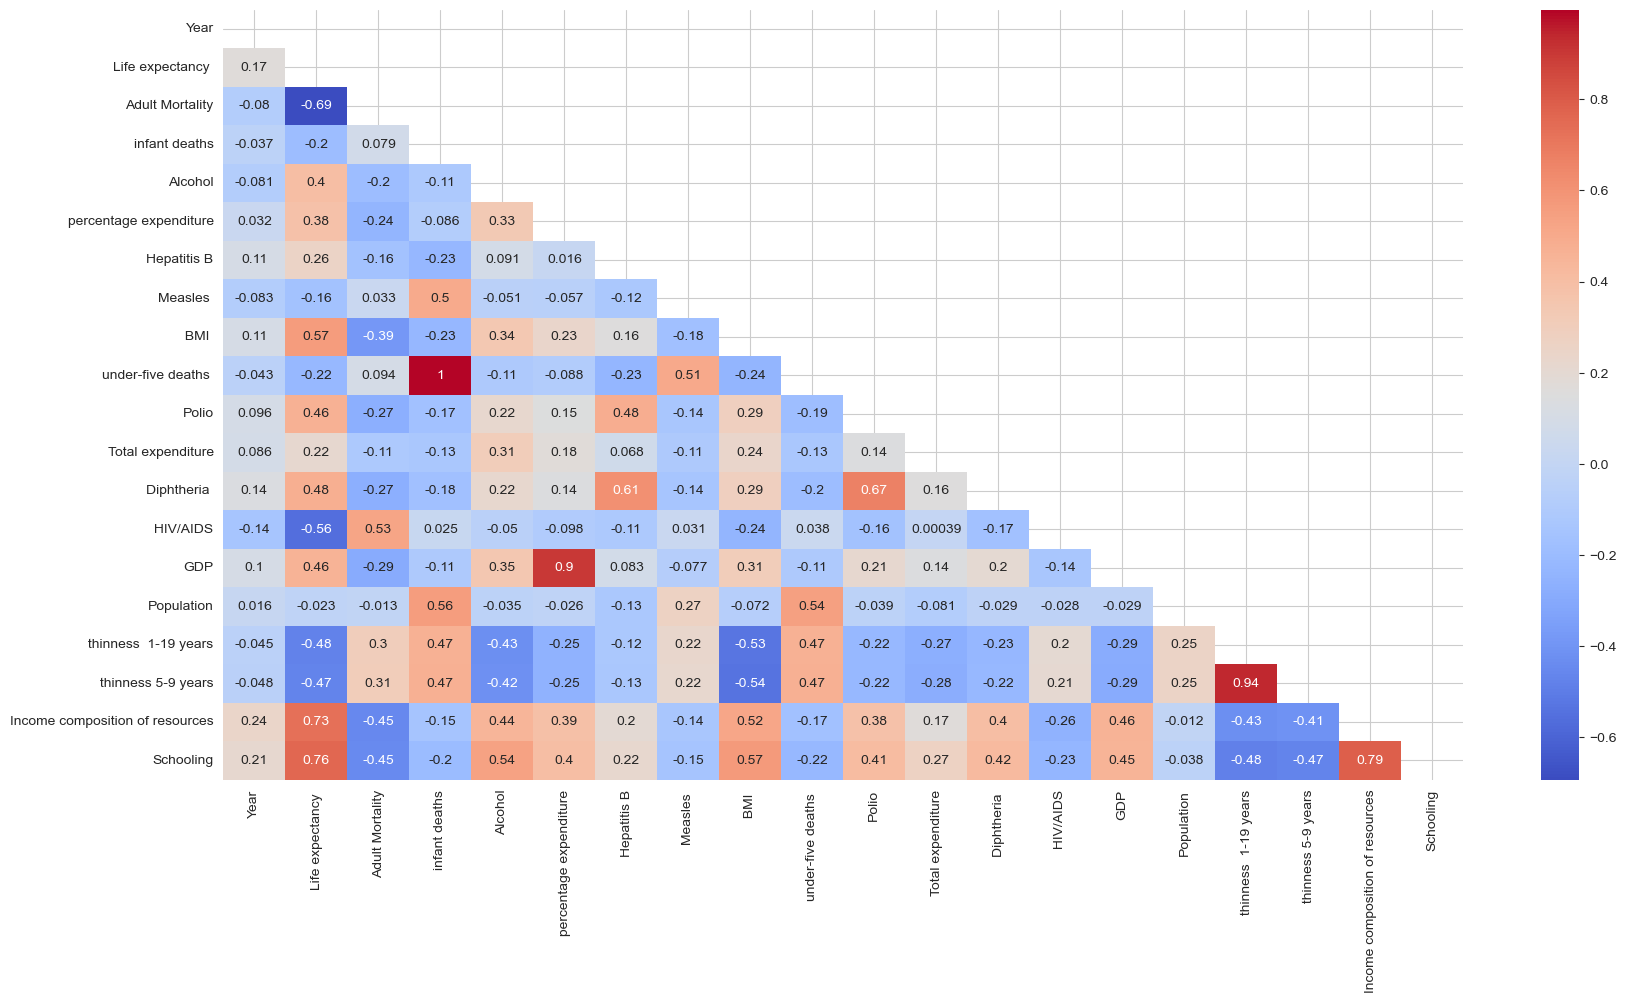

In [84]:
# Visualising correlations in the data through a heatmap

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask = np.triu(df.corr()))

plt.show()

In [85]:
# Dropping the columns containing missing values that have a low correlation with 'Life Expectancy'

df.drop(columns=['Hepatitis B', 'GDP', 'Population'], inplace=True)

In [86]:
# Checking for nulls

null_vals(df)

,null,percent
Total expenditure,212,7.341
Schooling,160,5.540
Income composition of resources,160,5.540
under-five deaths,0,0.000
thinness 5-9 years,0,0.000
thinness 1-19 years,0,0.000
HIV/AIDS,0,0.000
Diphtheria,0,0.000
Polio,0,0.000
Country,0,0.000


In [87]:
# Exploring rows that have missing values in the 'Total expenditure' column

df.loc[df['Total expenditure'].isnull()].head(50)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,0.01,0.0,63,59.5,24,95.0,NaN,95.0,0.1,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,8.33,0.0,118,23.3,98,7.0,NaN,64.0,1.9,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,8.56,0.0,0,47.7,0,86.0,NaN,99.0,0.2,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,7.93,0.0,0,62.8,9,93.0,NaN,94.0,0.1,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,3.91,0.0,33,54.9,1,96.0,NaN,94.0,0.1,2.1,2.2,0.741,12.7
112,Australia,2015,Developed,82.8,59.0,1,9.71,0.0,74,66.6,1,93.0,NaN,93.0,0.1,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,12.32,0.0,309,57.6,0,93.0,NaN,93.0,0.1,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,0.01,0.0,0,52.5,6,98.0,NaN,96.0,0.1,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,9.45,0.0,0,64.5,0,95.0,NaN,95.0,0.1,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,1.57,0.0,0,63.6,0,98.0,NaN,98.0,0.1,6.2,6.1,0.823,14.5


In [88]:
# Filling the nulls in the 'Total expenditure' column with the next available value

df['Total expenditure'] = df['Total expenditure'].bfill(axis ='rows')

In [89]:
# Checking for nulls

null_vals(df)

,null,percent
Schooling,160,5.54
Income composition of resources,160,5.54
under-five deaths,0,0.00
thinness 5-9 years,0,0.00
thinness 1-19 years,0,0.00
HIV/AIDS,0,0.00
Diphtheria,0,0.00
Total expenditure,0,0.00
Polio,0,0.00
Country,0,0.00


In [90]:
# Replacing null values in the 'Income composition of resources' column with the mean of the income composition of resources of developed and developing countries accordingly

df['Income composition of resources'] = df['Income composition of resources'].fillna(df.groupby('Status')['Income composition of resources'].transform('mean'))

In [91]:
# Replacing missing values in the 'Schooling' column with the mean of the schooling of developed and developing countries accordingly

df['Schooling'] = df['Schooling'].fillna(df.groupby('Status')['Schooling'].transform('mean'))

In [92]:
# Checking for nulls. No nulls!

null_vals(df)

,null,percent
Country,0,0.0
under-five deaths,0,0.0
Income composition of resources,0,0.0
thinness 5-9 years,0,0.0
thinness 1-19 years,0,0.0
HIV/AIDS,0,0.0
Diphtheria,0,0.0
Total expenditure,0,0.0
Polio,0,0.0
BMI,0,0.0


In [93]:
# Checking the values of a developing country that previously had nulls in the 'Income composition of resources' and 'Schooling' column

df.loc[df['Country'] == "Somalia"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2377,Somalia,2015,Developing,55.0,312.0,50,0.01,0.0,7497,24.3,80,47.0,8.8,42.0,0.7,6.6,6.4,0.587465,11.352032
2378,Somalia,2014,Developing,54.3,321.0,51,0.01,0.0,10229,23.8,80,47.0,8.8,42.0,0.8,6.7,6.5,0.587465,11.352032
2379,Somalia,2013,Developing,54.2,318.0,51,0.01,0.0,3173,23.3,81,47.0,8.8,42.0,0.8,6.8,6.6,0.587465,11.352032
2380,Somalia,2012,Developing,53.1,336.0,51,0.01,0.0,9983,22.9,82,47.0,8.8,42.0,0.8,6.8,6.7,0.587465,11.352032
2381,Somalia,2011,Developing,53.1,329.0,51,0.01,0.0,17298,22.4,82,49.0,8.8,41.0,0.8,6.9,6.7,0.587465,11.352032
2382,Somalia,2010,Developing,52.4,336.0,52,0.01,0.0,115,22.0,83,49.0,8.8,45.0,0.8,7.0,6.8,0.587465,11.352032
2383,Somalia,2009,Developing,52.2,335.0,52,0.01,0.0,13,21.5,84,41.0,8.8,42.0,0.8,7.1,6.9,0.587465,11.352032
2384,Somalia,2008,Developing,51.9,336.0,52,0.01,0.0,1081,21.1,84,4.0,8.8,31.0,0.9,7.2,7.0,0.587465,11.352032
2385,Somalia,2007,Developing,51.5,34.0,52,0.01,0.0,1149,2.7,84,4.0,8.8,4.0,0.9,7.3,7.1,0.587465,11.352032
2386,Somalia,2006,Developing,51.5,337.0,51,0.01,0.0,7,2.2,83,26.0,8.8,26.0,0.9,7.4,7.2,0.587465,11.352032


In [94]:
# Checking the values of a developed country that previously had nulls in the 'Income composition of resources' and 'Schooling' column

df.loc[df['Country'] == "United Kingdom of Great Britain and Northern Ireland"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2762,United Kingdom of Great Britain and Northern I...,2015,Developed,81.2,69.0,3,10.66,0.0,91,66.6,4,96.0,9.12,96.0,0.1,0.8,0.6,0.852489,15.845474
2763,United Kingdom of Great Britain and Northern I...,2014,Developed,81.0,71.0,3,10.37,0.0,133,66.0,4,95.0,9.12,95.0,0.1,0.8,0.5,0.852489,15.845474
2764,United Kingdom of Great Britain and Northern I...,2013,Developed,87.0,72.0,3,10.32,0.0,1919,65.4,4,95.0,9.34,95.0,0.1,0.8,0.5,0.852489,15.845474
2765,United Kingdom of Great Britain and Northern I...,2012,Developed,86.0,72.0,3,10.42,0.0,2092,64.8,4,95.0,9.41,95.0,0.1,0.8,0.5,0.852489,15.845474
2766,United Kingdom of Great Britain and Northern I...,2011,Developed,86.0,74.0,3,10.68,0.0,1112,64.2,4,95.0,9.34,95.0,0.1,0.8,0.5,0.852489,15.845474
2767,United Kingdom of Great Britain and Northern I...,2010,Developed,82.0,77.0,3,10.88,0.0,443,63.6,4,94.0,9.51,94.0,0.1,0.8,0.5,0.852489,15.845474
2768,United Kingdom of Great Britain and Northern I...,2009,Developed,81.0,78.0,4,10.79,0.0,1212,63.1,4,93.0,9.81,93.0,0.1,0.8,0.5,0.852489,15.845474
2769,United Kingdom of Great Britain and Northern I...,2008,Developed,79.6,8.0,4,11.47,0.0,1445,62.5,4,92.0,8.85,92.0,0.1,0.8,0.5,0.852489,15.845474
2770,United Kingdom of Great Britain and Northern I...,2007,Developed,79.5,8.0,4,11.84,0.0,1022,61.9,4,92.0,8.42,92.0,0.1,0.7,0.5,0.852489,15.845474
2771,United Kingdom of Great Britain and Northern I...,2006,Developed,79.3,82.0,4,11.61,0.0,764,61.3,4,92.0,8.36,92.0,0.1,0.7,0.5,0.852489,15.845474


In [95]:
# Saving cleaned data to a csv file without carrying the index across

df.to_csv('Cleaned_Life_Expectancy_Data.csv', index=False)